# Overlapping Null Models and Statistical Tests

In [21]:
import pybedtools
from pybedtools import BedTool
a = pybedtools.example_bedtool('a.bed')
a.saveas('tmp/fake_enhancers.bed')

<BedTool(tmp/fake_enhancers.bed)>

In [46]:
import random
from datetime import datetime

sample_bed = BedTool('tmp/fake_enhancers.bed')
b = sample_bed.shuffle(genome='hg19', chrom=False, seed=random.seed(datetime.now()))
print(a)
print("after shuffle:\n")
print(b) 

chr1	1	100	feature1	0	+
chr1	100	200	feature2	0	+
chr1	150	500	feature3	0	-
chr1	900	950	feature4	0	+

after shuffle:

chr15	5523319	5523418	feature1	0	+
chr17	71780507	71780607	feature2	0	+
chr19	42111283	42111633	feature3	0	-
chr6	44873251	44873301	feature4	0	+



In [53]:
encode_bed = BedTool('tmp/T-cell_ENCODE_sample.bed')
fantom_bed = BedTool('tmp/permissive_enhancers.bed')

In [56]:
def compute_size(row, prefix=None):
    col_name = prefix + '_name' if prefix else 'name'
    if row[col_name] == '.':
        return 0
    col_end = prefix + '_end' if prefix else 'end'
    col_start = prefix + '_start' if prefix else 'start'
    size = abs(row[col_end] - row[col_start])
    return size

def mean_size(bed):
    sample_df = bed.to_dataframe()
    sample_df['size'] = sample_df.apply(lambda row: compute_size(row), axis=1)
    return int(round(sample_df[['size']].mean()))

def std_size(bed):
    return int(round(sample_df[['size']].std()))


In [55]:
mean_size(fantom_bed)

288

In [57]:
std_size(fantom_bed)

136

In [64]:
encode_bed_sorted = encode_bed.sort()
fantom_bed_sorted = fantom_bed.sort()

In [361]:
fantom_shuffled_bed = fantom_bed.shuffle(genome='hg19', chrom=False, seed=random.seed(datetime.now()))
fantom_shuffled_bed_sorted = fantom_shuffled_bed.sort()
encode_shuffled_bed = encode_bed.shuffle(genome='hg19', chrom=False, seed=random.seed(datetime.now()))
encode_shuffled_bed_sorted = encode_shuffled_bed.sort()

In [426]:
empty_bed = BedTool()
fantom_random_bed = empty_bed.random(l=mean_size(fantom_bed), n=len(fantom_bed), genome='hg19')
fantom_random_bed_sorted = fantom_random_bed.sort()

In [304]:
encode_bed_sorted.jaccard(fantom_shuffled_bed_sorted, f=0.50)

{'intersection': 20069,
 'jaccard': 0.000275667,
 'n_intersections': 91,
 'union-intersection': 72801658}

In [305]:
encode_bed_sorted.jaccard(encode_bed_sorted, f=0.50)

{'intersection': 60461879,
 'jaccard': 1.0,
 'n_intersections': 42001,
 'union-intersection': 60461879}

In [328]:
encode_bed_sorted.jaccard(fantom_bed_sorted, f=0.50)

{'intersection': 230499,
 'jaccard': 0.00317419,
 'n_intersections': 1000,
 'union-intersection': 72616569}

In [79]:
encode_bed_sorted.fisher(encode_bed_sorted, f=0.50, genome='hg19')

<FisherOutput at 4673763424>
# Number of query intervals: 42001
# Number of db intervals: 42001
# Number of overlaps: 42001
# Number of possible intervals (estimated): 1088888
# phyper(42001 - 1, 42001, 1088888 - 42001, 42001, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 42001        | 0            |
# not in -a | 0            | 1046887      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
1	0	0	inf

In [238]:
encode_bed_sorted.fisher(fantom_shuffled_bed_sorted, f=0.50, genome='hg19')

<FisherOutput at 4843729752>
# Number of query intervals: 42001
# Number of db intervals: 43007
# Number of overlaps: 91
# Number of possible intervals (estimated): 1813919
# phyper(91 - 1, 42001, 1813919 - 42001, 43007, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 91           | 41910        |
# not in -a | 42916        | 1729002      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
4.5358e-309	1	8.1761e-309	0.087

In [311]:
a = encode_bed_sorted.fisher(fantom_bed_sorted, f=0.50, genome='hg19')

In [327]:
a

<FisherOutput at 4844067752>
# Number of query intervals: 42001
# Number of db intervals: 43010
# Number of overlaps: 1000
# Number of possible intervals (estimated): 1813917
# phyper(1000 - 1, 42001, 1813917 - 42001, 43010, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 1000         | 41001        |
# not in -a | 42010        | 1729906      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
0.56134	0.45147	0.88391	1.004

In [262]:
import scipy.stats as stats
obs = [[1000, 41001], [42010, 1729906]]
oddsratio, pvalue = stats.fisher_exact(obs)
chi2 = stats.chi2_contingency(obs)
print("Fisher's oddsratio:", oddsratio, "pvalue:", pvalue)
print("Chi2:", chi2[0], "pvalue:", chi2[1])

Fisher's oddsratio: 1.00432754582 pvalue: 0.883911414896
Chi2: 0.0137163422923 pvalue: 0.906767505506


In [100]:
len(encode_bed_sorted)

42001

In [98]:
encode_bed_sorted.fisher(fantom_bed_sorted, f=0.10, genome='hg19')

<FisherOutput at 4646469984>
# Number of query intervals: 42001
# Number of db intervals: 43010
# Number of overlaps: 4474
# Number of possible intervals (estimated): 1813917
# phyper(4474 - 1, 42001, 1813917 - 42001, 43010, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 4474         | 37527        |
# not in -a | 38536        | 1733380      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
0	1	0	5.363

In [52]:
sample_df = sample_bed.to_dataframe()
sample_df['size'] = sample_df.apply(lambda row: compute_size(row), axis=1)
int(round(sample_df[['size']].mean()))


150

In [49]:
len(sample_df)

4

## Fisher, Jaccard

In [417]:
def build_tests_df(bed, bed_overlap_with, bed_name, bed_overlap_with_name, biosample_name, assembly):
    columns = ['encyclopedia', 'biosample_name', 'ovlp_encyclopedia', 'encyclopedia_size', 'ovlp_encyclopedia_size',
          'min_ovlp', 'ovlp_count', 'fisher_left_p', 'fisher_right_p', 'fisher_two_p', 'fisher_oddsratio', 'jaccard']
    
    tests_df = pd.DataFrame(columns=columns)
   
    a_size = len(bed)
    b_size = len(bed_overlap_with)
    
    for i in range (1, 10):
        min_ovlp = i*0.1

        #fisher test
        fisher = bed.fisher(bed_overlap_with, f=min_ovlp, genome=assembly)
        overlaps_count = fisher.table['in -a']['in -b']
        left_tail_fisher_pvalue = fisher.left_tail
        right_tail_fisher_pvalue = fisher.right_tail
        two_tail_fisher_pvalue = fisher.two_tail
        oddsratio_fisher = fisher.ratio

        # jaccard index
        jaccard = bed.jaccard(bed_overlap_with, f=min_ovlp)
        jaccard_index = jaccard['jaccard']

        row_array = [bed_name, biosample_name, bed_overlap_with_name, a_size, b_size, 
                     min_ovlp, overlaps_count, left_tail_fisher_pvalue, right_tail_fisher_pvalue, 
                     two_tail_fisher_pvalue, oddsratio_fisher, jaccard_index]

        temp_df = pd.DataFrame([row_array], columns=columns)
        tests_df = tests_df.append(temp_df)

    tests_df.reset_index(inplace=True, drop=True)
    return tests_df
    

In [427]:
base_encyclopedia = 'ENCODE'
biosample_name = 'T-cell'
overlapping_encyclopedia = 'FANTOM'


tests_df = build_tests_df(encode_bed_sorted, fantom_bed_sorted, 'ENCODE', 'FANTOM', 'T-cell', 'hg19')
tests_df_shuffled = build_tests_df(encode_bed_sorted, fantom_shuffled_bed_sorted, 'ENCODE', 'FANTOM_shuffled', 'T-cell', 'hg19')
tests_df_random = build_tests_df(encode_bed_sorted, fantom_random_bed_sorted, 'ENCODE', 'FANTOM_random', 'T-cell', 'hg19')

In [419]:
tests_df

,encyclopedia,biosample_name,ovlp_encyclopedia,encyclopedia_size,ovlp_encyclopedia_size,min_ovlp,ovlp_count,fisher_left_p,fisher_right_p,fisher_two_p,fisher_oddsratio,jaccard
0,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.1,4474.0,0.000000e+00,1.000000e+00,0.000000e+00,5.363,0.022231
1,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.2,2529.0,0.000000e+00,1.000000e+00,0.000000e+00,2.740,0.012206
2,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.3,1654.0,1.000000e+00,1.495200e-85,2.449500e-85,1.715,0.007260
3,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.4,1216.0,1.000000e+00,2.565700e-12,4.610600e-12,1.234,0.004569
4,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.5,1000.0,5.613400e-01,4.514700e-01,8.839100e-01,1.004,0.003174
5,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.6,872.0,2.232800e-05,9.999800e-01,4.629100e-05,0.870,0.002448
6,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.7,777.0,9.617200e-14,1.000000e+00,1.897100e-13,0.772,0.001987
7,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.8,684.0,6.253500e-27,1.000000e+00,1.275700e-26,0.676,0.001643
8,ENCODE,T-cell,FANTOM,42001.0,43011.0,0.9,578.0,6.777000e-49,1.000000e+00,1.305400e-48,0.569,0.001320


In [420]:
tests_df_random

,encyclopedia,biosample_name,ovlp_encyclopedia,encyclopedia_size,ovlp_encyclopedia_size,min_ovlp,ovlp_count,fisher_left_p,fisher_right_p,fisher_two_p,fisher_oddsratio,jaccard
0,ENCODE,T-cell,FANTOM_shuffled,42001.0,43011.0,0.1,462.0,6.148300e-83,1.0,1.139900e-82,0.452,0.001843
1,ENCODE,T-cell,FANTOM_shuffled,42001.0,43011.0,0.2,223.0,3.457700e-199,1.0,5.781400e-199,0.216,0.000852
2,ENCODE,T-cell,FANTOM_shuffled,42001.0,43011.0,0.3,154.0,2.328700e-250,1.0,3.824300e-250,0.148,0.000552
3,ENCODE,T-cell,FANTOM_shuffled,42001.0,43011.0,0.4,110.0,8.273500e-290,1.0,1.808400e-289,0.106,0.000339
4,ENCODE,T-cell,FANTOM_shuffled,42001.0,43011.0,0.5,91.0,4.535800e-309,1.0,8.176100e-309,0.087,0.000276
5,ENCODE,T-cell,FANTOM_shuffled,42001.0,43011.0,0.6,76.0,0.000000e+00,1.0,0.000000e+00,0.073,0.000230
6,ENCODE,T-cell,FANTOM_shuffled,42001.0,43011.0,0.7,62.0,0.000000e+00,1.0,0.000000e+00,0.060,0.000149
7,ENCODE,T-cell,FANTOM_shuffled,42001.0,43011.0,0.8,54.0,0.000000e+00,1.0,0.000000e+00,0.052,0.000132
8,ENCODE,T-cell,FANTOM_shuffled,42001.0,43011.0,0.9,44.0,0.000000e+00,1.0,0.000000e+00,0.042,0.000103


In [428]:
merged_tests_df = tests_df.append(tests_df_random).append(tests_df_shuffled)
merged_tests_df.reset_index(drop=True, inplace=True)

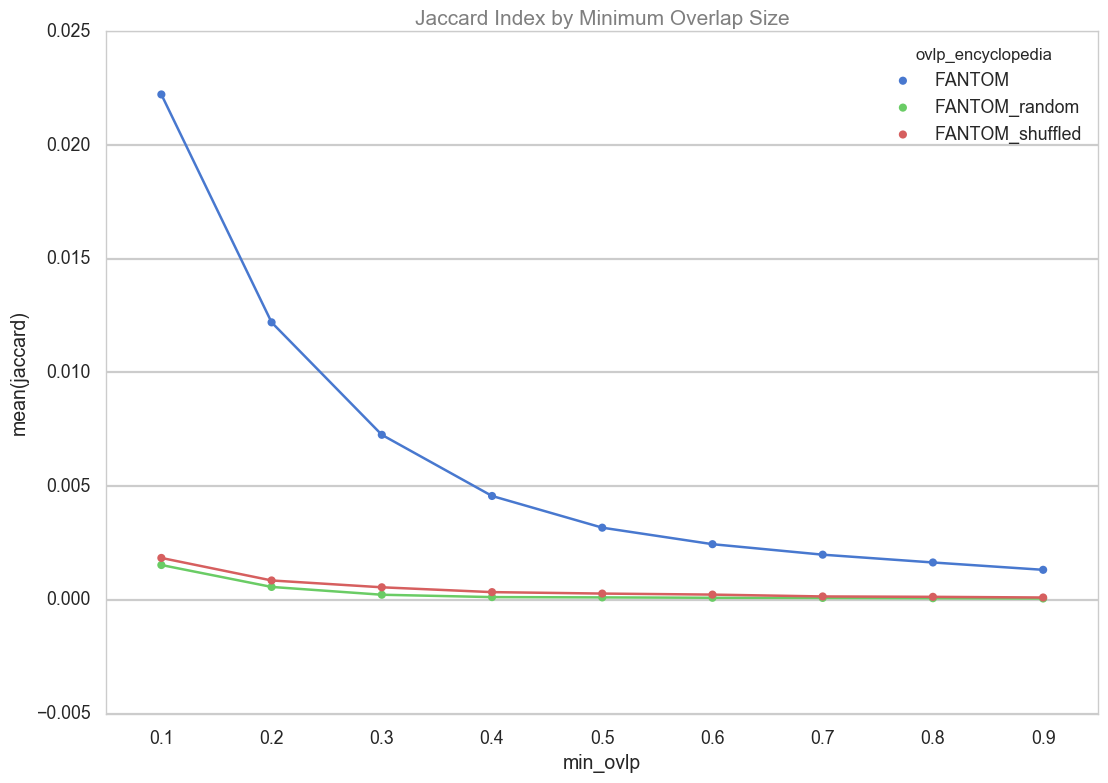

In [429]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g = sns.pointplot(x="min_ovlp", y="jaccard", hue="ovlp_encyclopedia", data=merged_tests_df,
                   capsize=.2, palette="muted", size=6, aspect=1)
g.axes.set_title('Jaccard Index by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)

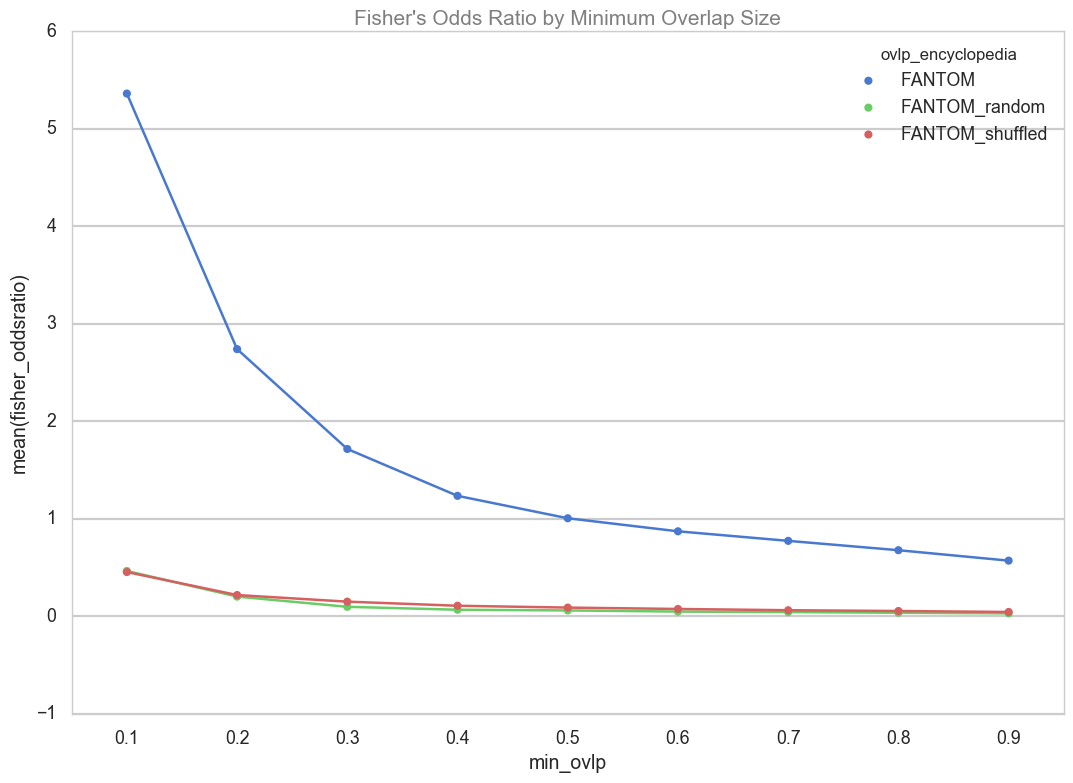

In [435]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g = sns.pointplot(x="min_ovlp", y="fisher_oddsratio", hue="ovlp_encyclopedia", data=merged_tests_df,
                   capsize=.2, palette="muted", size=6, aspect=1)
g.axes.set_title('Fisher\'s Odds Ratio by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)

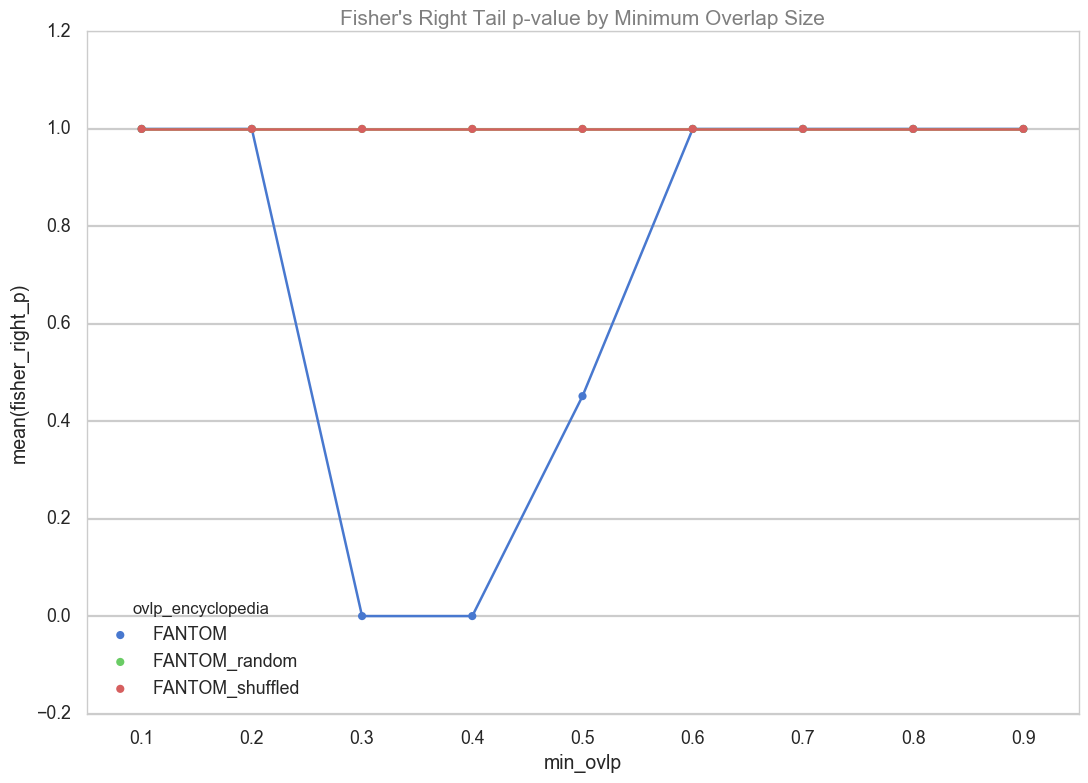

In [437]:
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g = sns.pointplot(x="min_ovlp", y="fisher_right_p", hue="ovlp_encyclopedia", data=merged_tests_df,
                   capsize=.2, palette="muted", size=6, aspect=1)
g.axes.set_title('Fisher\'s Right Tail p-value by Minimum Overlap Size', fontsize=15,color="black",alpha=0.5)

## Relative Distance

In [185]:
import pandas as pd
df_reldist = pd.DataFrame(encode_bed_sorted.reldist(fantom_bed_sorted))
df_reldist.T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,3198.000,1642.000,1324.000,1143.000,1057.000,1068.000,999.000,886.000,895.000,867.000,...,701.000,660.000,680.000,685.000,678.000,698.000,657.000,663.000,652.000,690.000
fraction,0.076,0.039,0.032,0.027,0.025,0.025,0.024,0.021,0.021,0.021,...,0.017,0.016,0.016,0.016,0.016,0.017,0.016,0.016,0.016,0.016
reldist,0.000,0.010,0.020,0.030,0.040,0.050,0.060,0.070,0.080,0.090,...,0.400,0.410,0.420,0.430,0.440,0.450,0.460,0.470,0.480,0.490
total,41923.000,41923.000,41923.000,41923.000,41923.000,41923.000,41923.000,41923.000,41923.000,41923.000,...,41923.000,41923.000,41923.000,41923.000,41923.000,41923.000,41923.000,41923.000,41923.000,41923.000


In [214]:
df_reldist_random = pd.DataFrame(encode_bed_sorted.reldist(fantom_shuffled_bed_sorted))
df_reldist_random = df_reldist_random[0:50]

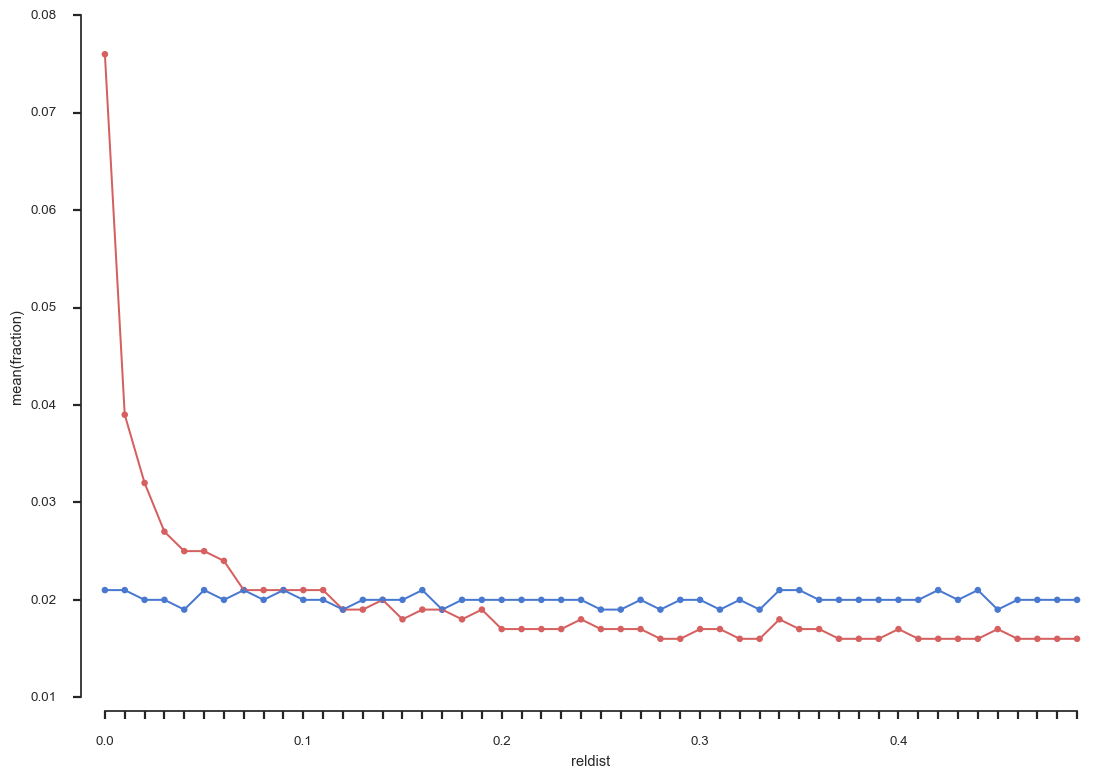

In [215]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})

g1 = sns.pointplot(x='reldist', y='fraction', data=df_reldist,  color='r')
g2 = sns.pointplot(x='reldist', y='fraction', data=df_reldist_random, color='b')

sns.despine(offset=10, trim=True)
#plot.set_yscale("log")
#df_reldist[['reldist','fraction']].plot()
for ind, label in enumerate(g1.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
